<a href="https://colab.research.google.com/github/diabateyoussouf/MNIST_Classifier-for-tensorflow/blob/main/TP_CNN_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # *DIABATE YOUSSOUF MSDIA*
  # `Apprentissage profond`
  # **TP: Reconnaissance de chiffres avec les CNN**

In [27]:
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping

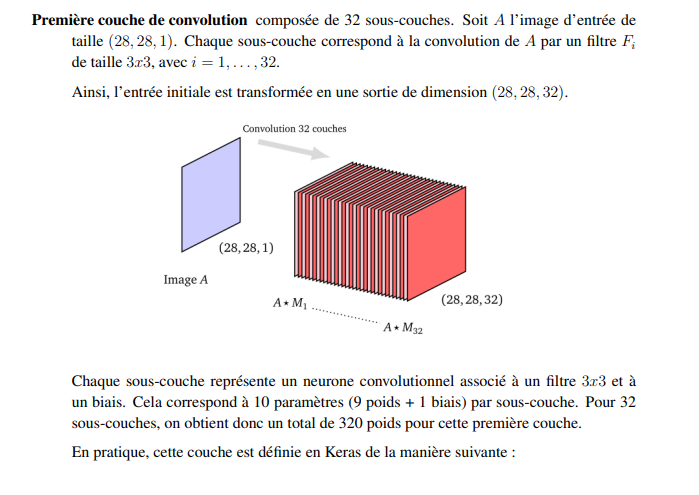

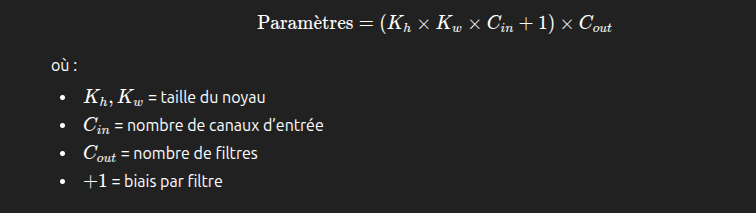

In [2]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.add(Conv2D(16,(3,3),activation="relu"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │         4,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,944 (19.31 KB)

 Trainable params: 4,944 (19.31 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.add(Flatten())
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,944 (19.31 KB)

 Trainable params: 4,944 (19.31 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.add(Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       108,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,114 (441.85 KB)

 Trainable params: 113,114 (441.85 KB)

 Non-trainable params: 0 (0.00 B)

# Partie 2:

In [7]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

### Certains exemples

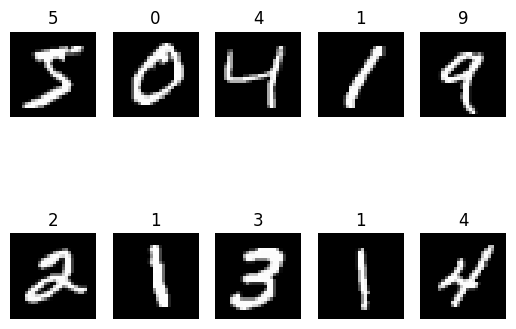

In [49]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
plt.show()

Compile modèle 1

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

1. Définir le modèle précédent et tester ses performances sur le jeu de données MNIST.

In [10]:
history = model.fit(
    X_train,y_train,
    epochs=10,
    validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9042 - loss: 0.7578 - val_accuracy: 0.9700 - val_loss: 0.0936
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9800 - loss: 0.0677 - val_accuracy: 0.9763 - val_loss: 0.0793
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9870 - loss: 0.0414 - val_accuracy: 0.9767 - val_loss: 0.0802
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9904 - loss: 0.0303 - val_accuracy: 0.9808 - val_loss: 0.0709
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9924 - loss: 0.0225 - val_accuracy: 0.9799 - val_loss: 0.0898
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9933 - loss: 0.0201 - val_accuracy: 0.9776 - val_loss: 0.1055
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9949 - loss: 0.0175 - val_accuracy: 0.9794 - val_loss: 0.1160
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9940 - loss: 0.0195 -

Fonctions display les courbes

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def curve(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

Display curve to train

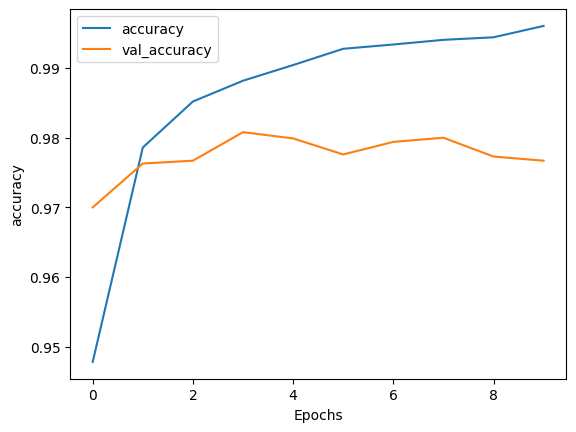

In [50]:
curve(history,'accuracy')

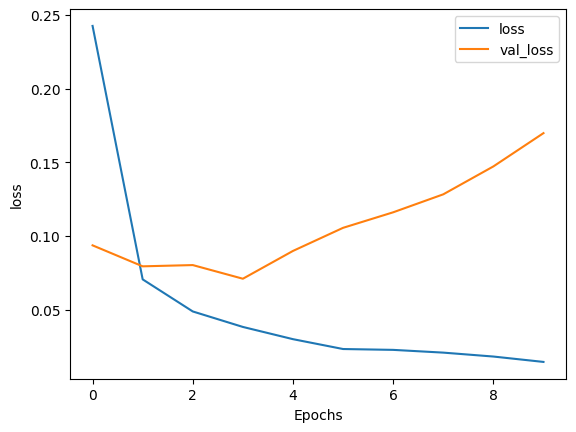

In [51]:
curve(history,'loss')

2. Proposer et implémenter un nouveau modèle CNN composé des éléments suivants :

In [29]:
model2 = Sequential()
model2.add(Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(16,(3,3),activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.20))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,690 (256.60 KB)

 Trainable params: 65,690 (256.60 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
earlyStop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [33]:
history2 = model2.fit(
    X_train,y_train,
    epochs=10,
    callbacks=[earlyStop],
    validation_data=(X_test,y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8088 - loss: 1.1235 - val_accuracy: 0.9725 - val_loss: 0.0878
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9638 - loss: 0.1170 - val_accuracy: 0.9822 - val_loss: 0.0573
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9729 - loss: 0.0889 - val_accuracy: 0.9838 - val_loss: 0.0541
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0729 - val_accuracy: 0.9843 - val_loss: 0.0531
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0633 - val_accuracy: 0.9888 - val_loss: 0.0368
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9837 - loss: 0.0544 - val_accuracy: 0.9874 - val_loss: 0.0451
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0564 - val_accuracy: 0.9831 - val_loss: 0.0539
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0462 -

Curve for modèle 2

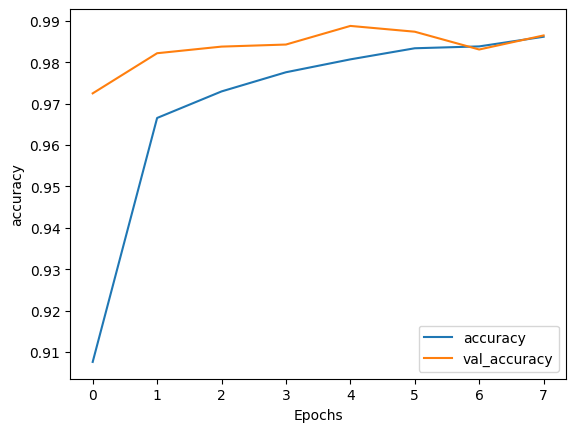

In [52]:
curve(history2,'accuracy')


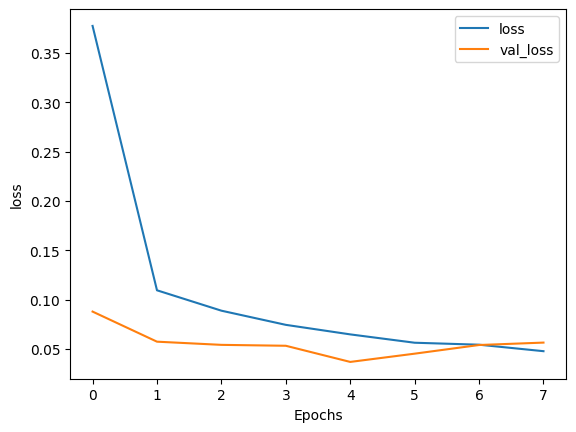

In [53]:
curve(history2,'loss')

### Les accuracys des deux mdoèles

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


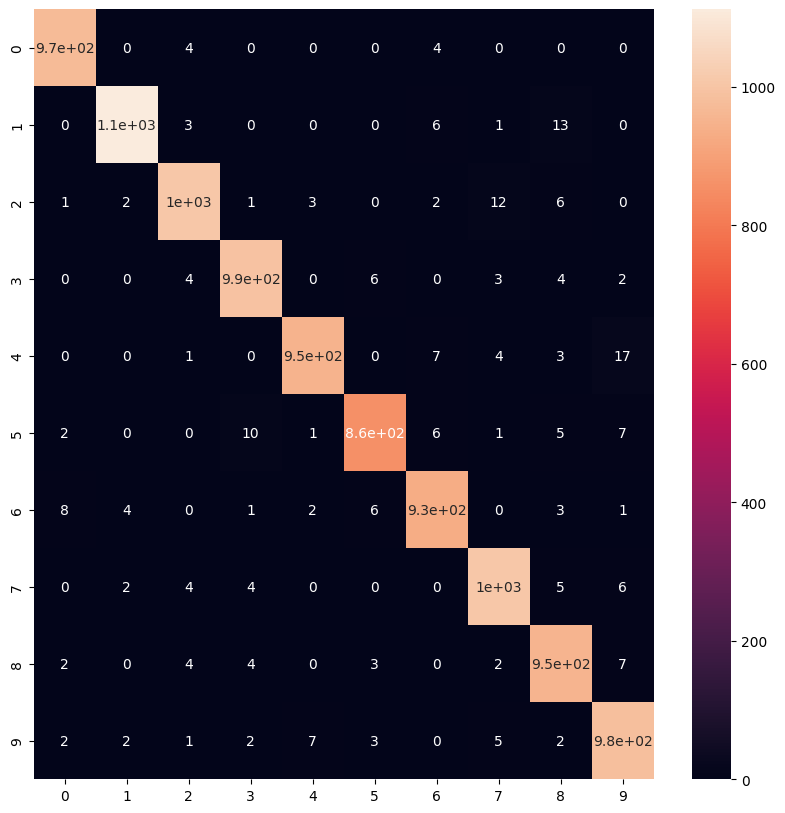

In [42]:
plt.figure(figsize=(10,10))
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
sns.heatmap(confusion_matrix(y_test, predicted_classes), annot=True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


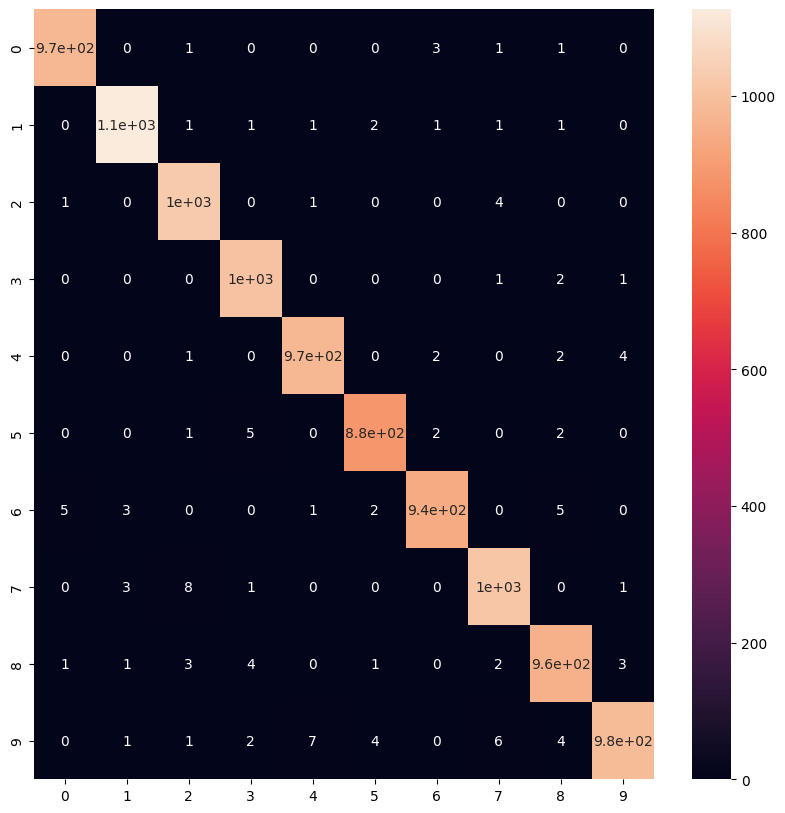

In [41]:
plt.figure(figsize=(10,10))
predictions = model2.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
sns.heatmap(confusion_matrix(y_test, predicted_classes), annot=True)
plt.show()

## Les prédictions

    Model1

In [47]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



    Model2

In [48]:
predictions = model2.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Prédictions avec Modèle 2

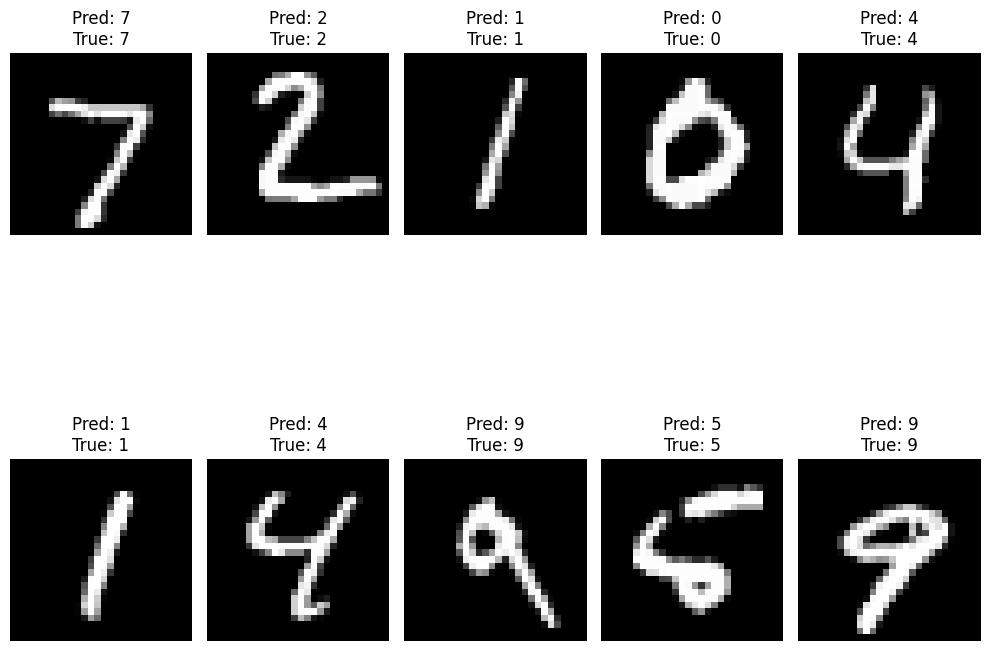

In [46]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(f'Pred: {predicted_classes[i]}\nTrue: {y_test[i]}')

plt.tight_layout()
plt.show()


3. Définir et analyser l’architecture CNN suivante :

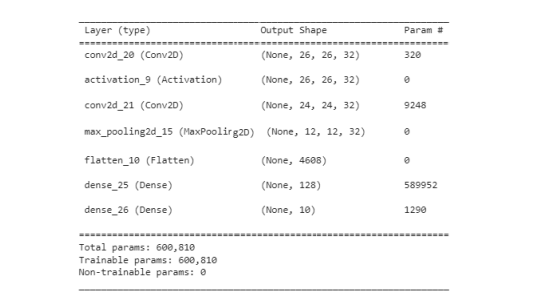

Definition d'arch

Input (28,28,1)

Conv2D 32 filtres 3x3

Activation

Conv2D 32 filtres 3x3

MaxPooling 2x2

Flatten

Dense 128

Dense 10

| Couche  | Sortie   |
| ------- | -------- |
| Input   | 28×28×1  |
| Conv    | 26×26×32 |
| Conv    | 24×24×32 |
| Pool    | 12×12×32 |
| Flatten | 4608     |
| Dense   | 128      |
| Dense   | 10       |
